## Surprise Housing Case Study

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

#### Solution:
The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation


### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm

from sklearn.impute import SimpleImputer
from scipy.stats import boxcox

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# summary of the dataset: 1460 rows, 81 columns, null values present
print(housing_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
pd.set_option('display.max_columns', None)
housing_data_summary = housing_data.describe()
housing_data_summary

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Majority of the numeric features  have outliers
- Dropping all the outliers will cause loss of information.
- Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of **[25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]**
- IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
- Target column 'SalePrice' is excluded in this

In [5]:
# Calculate IQR
Q1 = housing_data_summary.loc['25%']
Q3 = housing_data_summary.loc['75%']
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [6]:
# Update outlier values - iteration should exclude categorical variables
numeric_df = housing_data.select_dtypes(include=['int64', 'float64'])
for col in numeric_df.columns:
    if col!='SalePrice':
        housing_data[col][housing_data[col] > upper_bound[col]] = upper_bound[col]
        housing_data[col][housing_data[col] < lower_bound[col]] = lower_bound[col]
    
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,0.0,563.777740,1050.254795,1157.018151,346.789041,0.0,1503.735873,0.425000,0.0,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,0.0,431.710214,397.937878,362.583002,435.791621,0.0,481.375641,0.517373,0.0,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.0,0.000000,42.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.0,223.000000,795.750000,882.000000,0.000000,0.0,1129.500000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.0,477.500000,991.500000,1087.000000,0.000000,0.0,1464.000000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.0,808.000000,1298.250000,1391.250000,728.000000,0.0,1776.750000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,0.0,1685.500000,2052.000000,2155.125000,1820.000000,0.0,2747.625000,2.500000,0.0,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


- We can see that there are few columns with all values as zero after updating the outier values
- We can drop these columns

In [7]:
# Check if each column contains all zero values
is_all_zero = (housing_data == 0).all()

# Filter out columns with all zero values
non_zero_columns = housing_data.columns[~is_all_zero]

# Create a new DataFrame with non-zero columns
housing_data_filtered = housing_data[non_zero_columns]

housing_data_filtered.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,563.777740,1050.254795,1157.018151,346.789041,1503.735873,0.425000,1.565068,0.382877,2.851712,1.0,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,431.710214,397.937878,362.583002,435.791621,481.375641,0.517373,0.550916,0.502885,0.759516,0.0,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,2.500000,3.000000,2.000000,4.500000,1.0,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000


- We can see that KitchenAbvGr (Kitchens above grade) is having 1.0 for all entries - so this will not be making any difference
- We can also remove Id since it is just the index column from 1 to 1460

In [8]:
housing_data_filtered.drop(['Id', 'KitchenAbvGr'], axis=1, inplace=True)
housing_data_filtered.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,563.777740,1050.254795,1157.018151,346.789041,1503.735873,0.425000,1.565068,0.382877,2.851712,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890
std,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,431.710214,397.937878,362.583002,435.791621,481.375641,0.517373,0.550916,0.502885,0.759516,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883
min,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.000000,42.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,1685.500000,2052.000000,2155.125000,1820.000000,2747.625000,2.500000,3.000000,2.000000,4.500000,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000


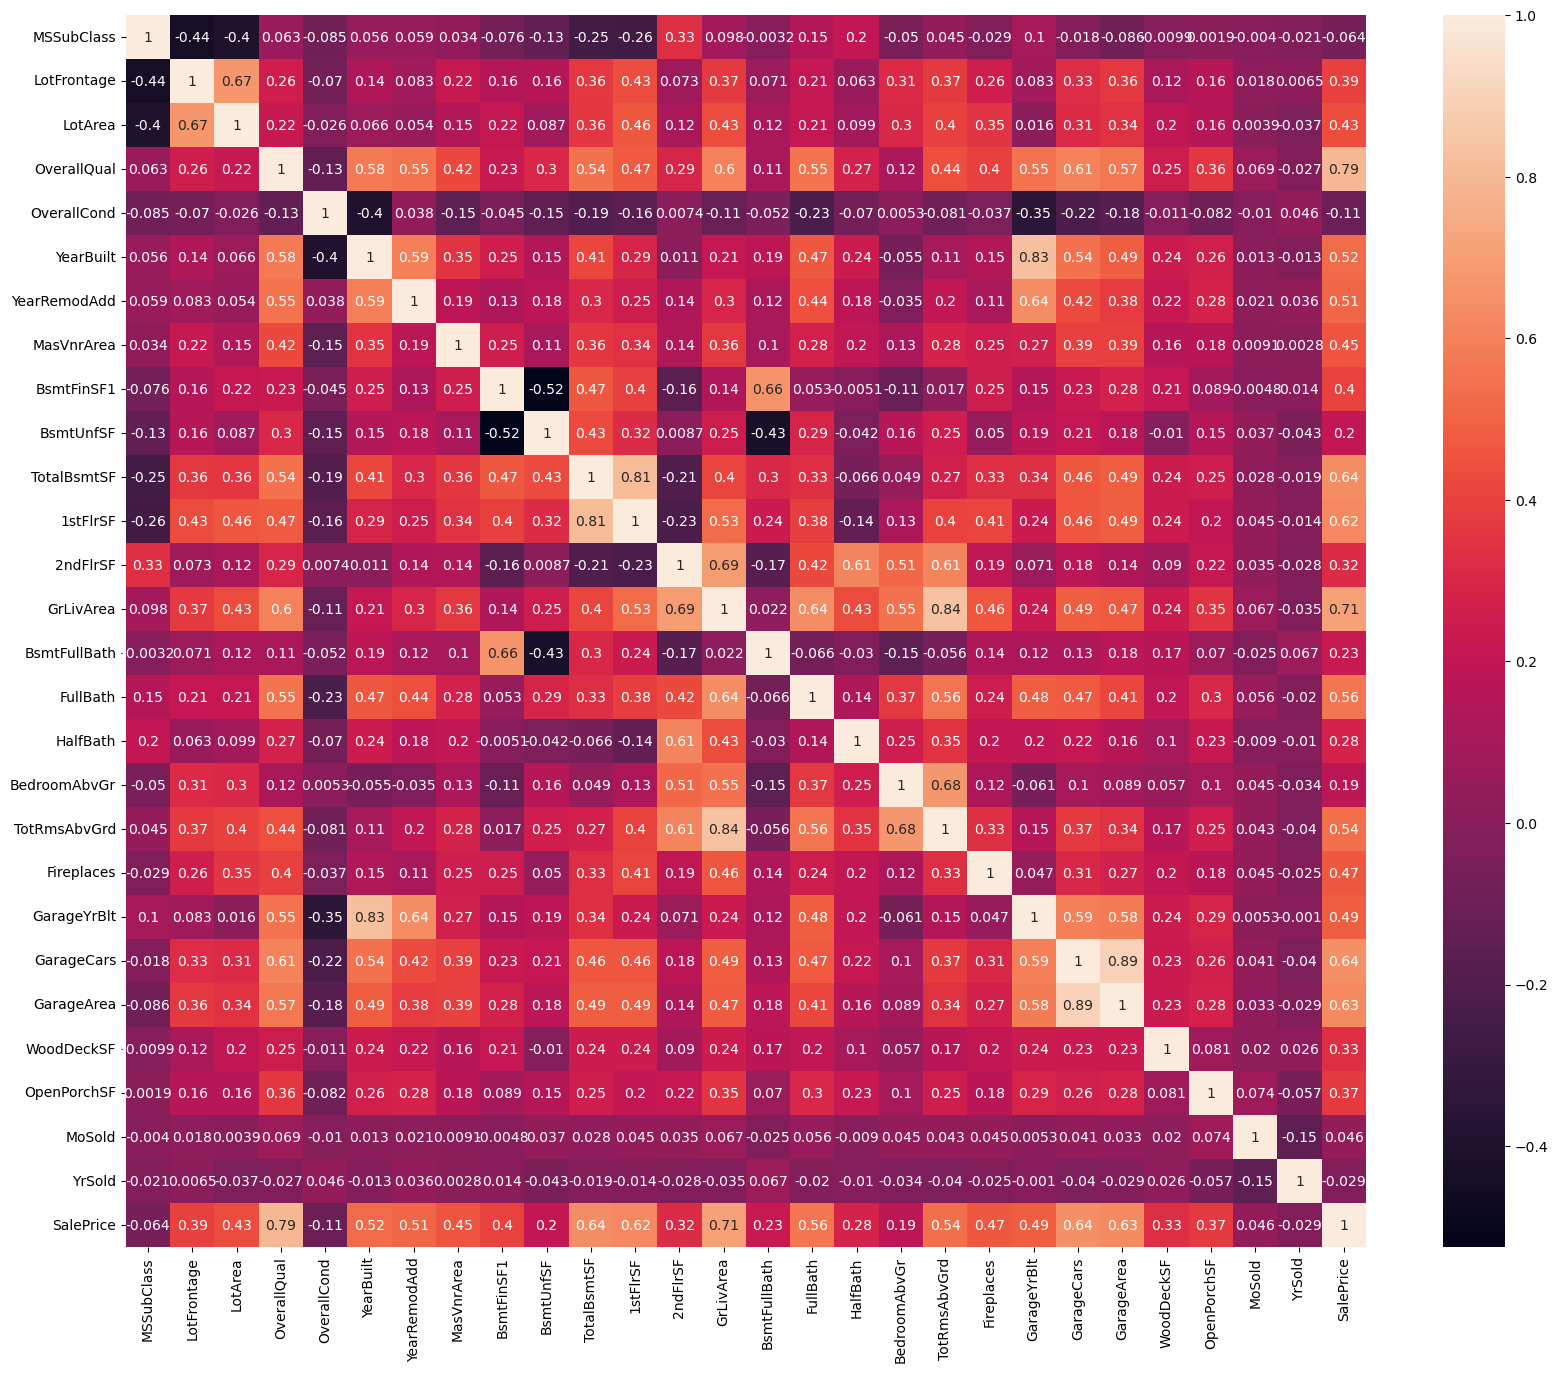

In [9]:
numeric_df = housing_data_filtered.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)

plt.show()

Some of the features have high correlation with each other

- GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars as area seems to be a better indicator
- GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt
- TotRmsAbvGrd (Total rooms above grade) and GrLivArea (Above grade (ground) living area square feet) (Correlation coefficient = 0.83), dropping GrLivArea
- TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF

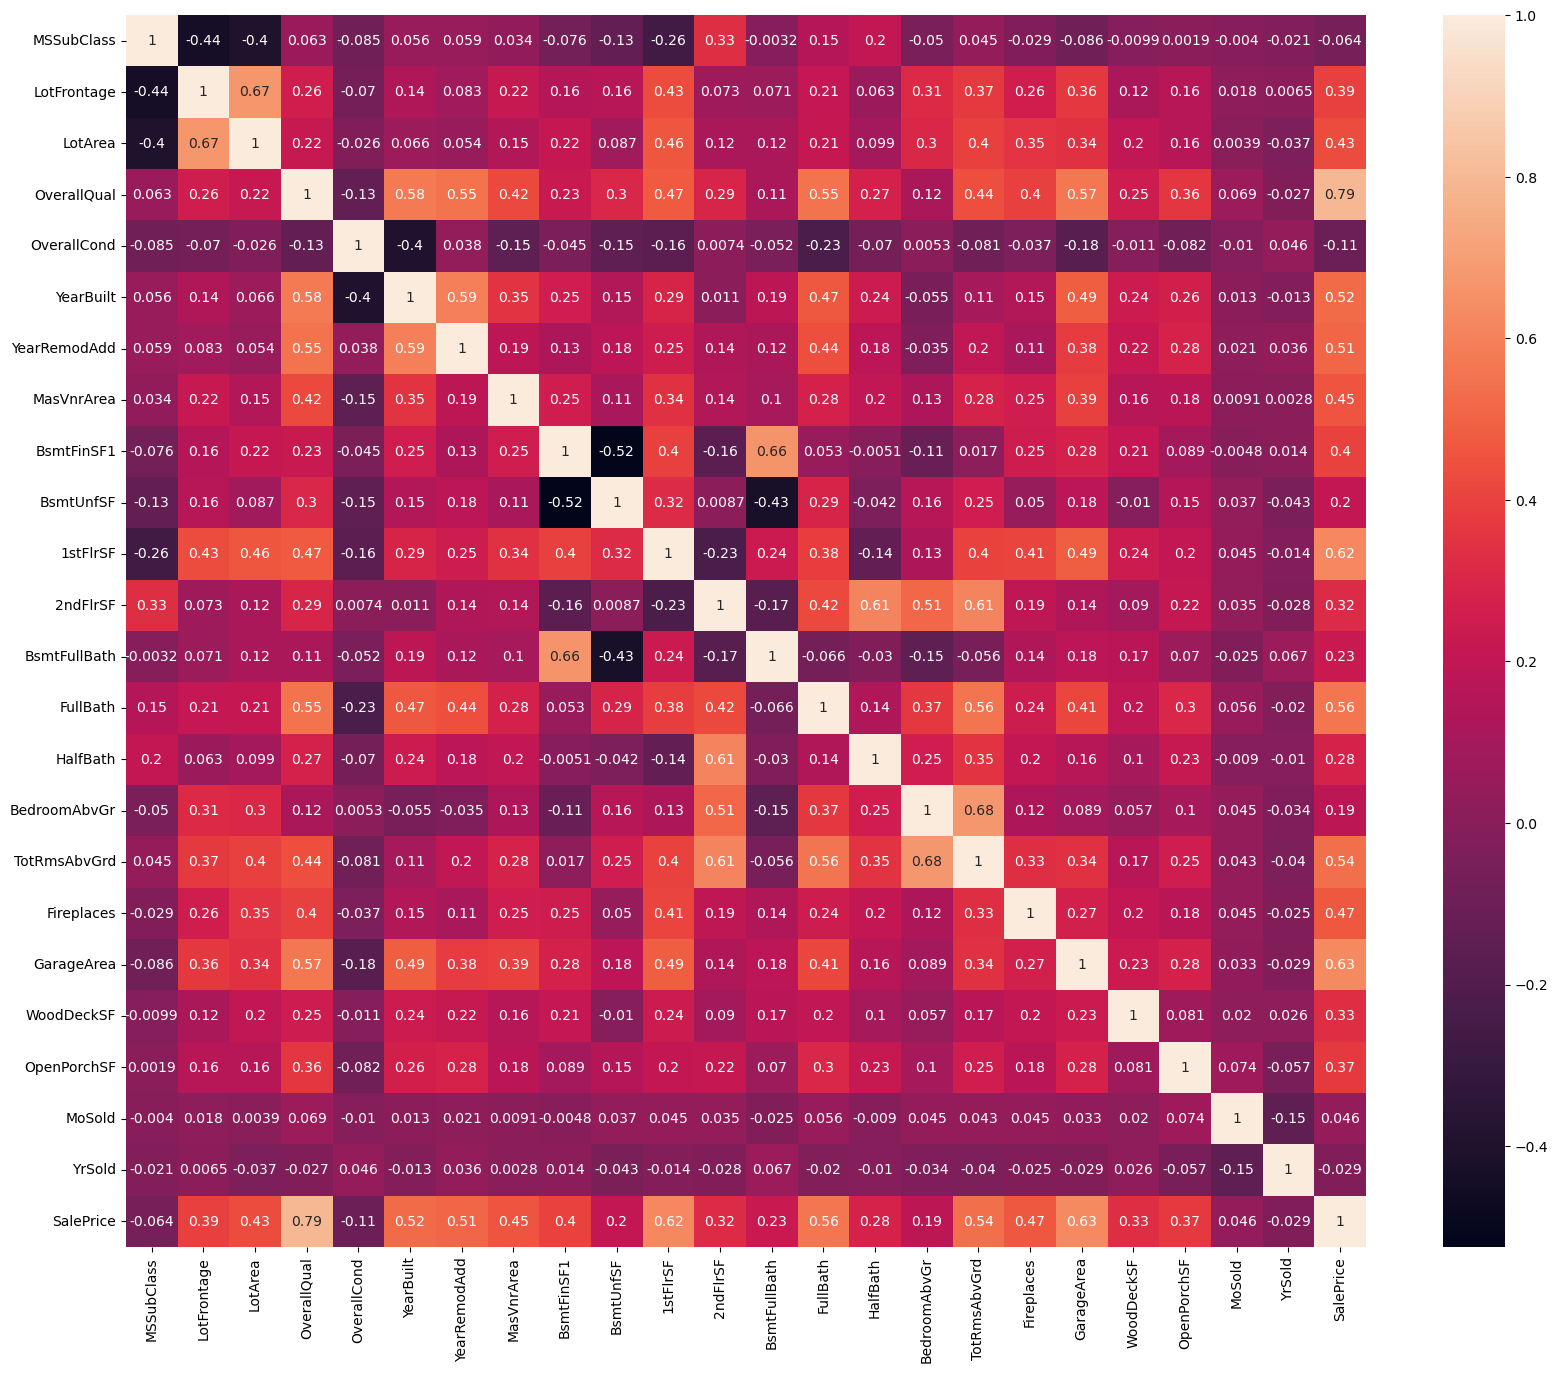

In [10]:
housing_data_filtered.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)
numeric_df = housing_data_filtered.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(),annot=True)

plt.show()

In [11]:
numeric_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,563.777740,1157.018151,346.789041,0.425000,1.565068,0.382877,2.851712,6.487671,0.611301,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890
std,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,431.710214,362.583002,435.791621,0.517373,0.550916,0.502885,0.759516,1.541916,0.638959,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883
min,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,882.000000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,1087.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,808.000000,1391.250000,728.000000,1.000000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,1685.500000,2155.125000,1820.000000,2.500000,3.000000,2.000000,4.500000,10.000000,2.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000


#### Univariate and Bivariate Analysis - Numerical Features

In [12]:
numeric_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

##### Analyzing Numerical Features with continuous values

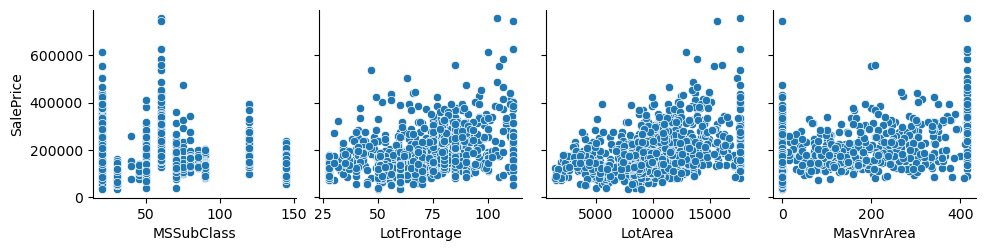

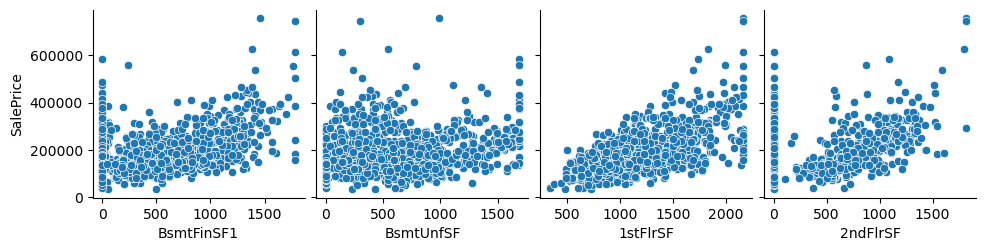

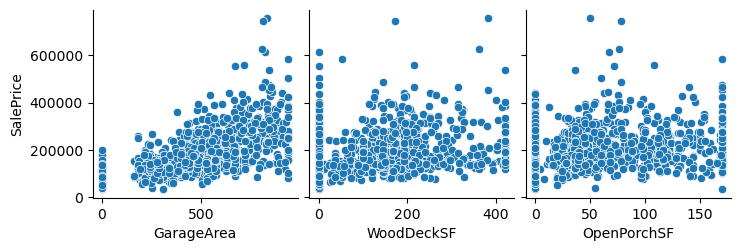

In [13]:
# Limit columns to that of continous variables
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 
            'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
            'GarageArea', 'WoodDeckSF', 'OpenPorchSF']
target = 'SalePrice'

sns.pairplot(housing_data_filtered, x_vars=features[:4], y_vars=[target], kind='scatter', diag_kind='kde')
sns.pairplot(housing_data_filtered, x_vars=features[4:8], y_vars=[target], kind='scatter', diag_kind='kde')
sns.pairplot(housing_data_filtered, x_vars=features[8:11], y_vars=[target], kind='scatter', diag_kind='kde')
plt.show()

- Features like 'LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF' and 'GarageArea' are showing positive correlation with SalePrice.
- 'MSSubClass' has discrete values

##### Visualizing the distribution of the numeric features

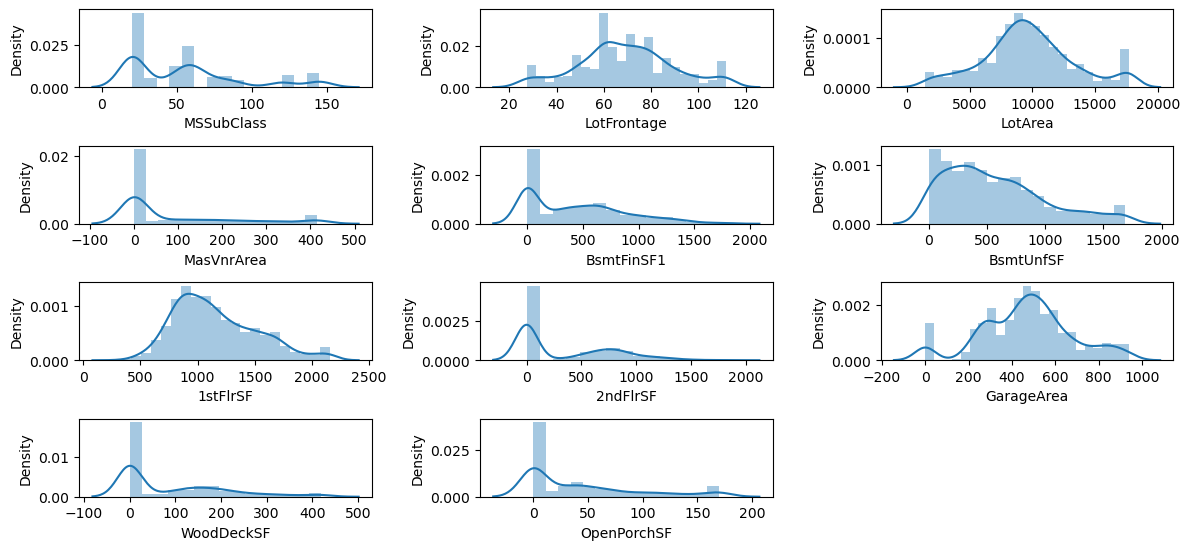

In [14]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 
                             'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 
                             'GarageArea', 'WoodDeckSF', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(housing_data_filtered[feature])
    plt.tight_layout()

##### Analyzing Numerical Features with Discrete Values

In [15]:
housing_data_filtered[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,2,1,3.0,8,0.0,2003,2003
1,6,7.5,5,2007,0.0,2,0,3.0,6,1.0,1976,1976
2,7,5.0,9,2008,1.0,2,1,3.0,6,1.0,2001,2002
3,7,5.0,2,2006,1.0,1,0,3.0,7,1.0,1915,1970
4,8,5.0,12,2008,1.0,2,1,4.0,9,1.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,2,1,3.0,7,1.0,1999,2000
1456,6,6.0,2,2010,1.0,2,0,3.0,7,2.0,1978,1988
1457,7,7.5,5,2010,0.0,2,0,4.0,9,2.0,1941,2006
1458,5,6.0,4,2010,1.0,1,0,2.0,5,0.0,1950,1996


In [ ]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(data=housing_data_filtered, x=feature, y='SalePrice')
    plt.tight_layout()


- 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)
- 'OverallCond' : SalePrice is highest for rating 5
- 'BsmtFullBath' = 2 has ighest sale price
- 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice 
- 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price

- 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold
- 'YearBuilt','YearRemodAdd': we need to analyze in moe detail

In [ ]:
housing_data_filtered['BsmtFullBath'].value_counts()

In [ ]:
housing_data_filtered[['YearBuilt','YearRemodAdd', 'YrSold']].describe()

In [ ]:
# Converting the year related features into number of years
for feature in ['YearBuilt','YearRemodAdd', 'YrSold']:
    housing_data_filtered[feature] = 2024 - housing_data_filtered[feature]

In [ ]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(data=housing_data_filtered, x=feature, y='SalePrice')
    plt.tight_layout()

- YrSold still does not show any significant trend

- SalePrice is more for recently built houses
- SalePrice is more for recently remodelled houses

#### Missing Value Handling - Numerical Features

In [ ]:
#check percentage of missing values in numeric features
missing_data_percentage = (numeric_df.isnull().mean() * 100).round(2)

# Filter columns where missing values exist
columns_with_missing = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
columns_with_missing

In [ ]:
# Since MasVnrArea has only 0.55% data missing, dropping rows with NULL values in MasVnrArea
housing_data_filtered = housing_data_filtered[~housing_data_filtered['MasVnrArea'].isnull()]
housing_data_filtered.shape

### Analyzing Categorical Features

In [ ]:
categorical_df = housing_data_filtered.select_dtypes(include=['object'])
categorical_df

In [ ]:
#check percentage of missing values in categorical features
missing_data_percentage = (categorical_df.isnull().mean() * 100).round(2)

# Filter columns where missing values exist
columns_with_missing = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
columns_with_missing

In [ ]:
housing_data_filtered['PoolQC'].value_counts()

In [ ]:
# dropping 'PoolQC' for very high percentage of missing value
housing_data_filtered.drop(['PoolQC'], axis=1, inplace=True)

In [ ]:
housing_data_filtered['Electrical'].isnull().sum()

In [ ]:
# dropping rows with null values in 'Electrical', for very low missing value count
housing_data_filtered.dropna(subset=['Electrical'], inplace=True)

- For 'Alley', Nan means 'No access to alley'

In [ ]:
# Imputing missing values with "Not_applicable"
housing_data_filtered['Alley'] = housing_data_filtered['Alley'].fillna(value='Not_applicable')

- For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'

In [ ]:
# Imputing missing values with "Not_applicable"
basement_categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
housing_data_filtered[basement_categorical_features] = housing_data_filtered[basement_categorical_features].fillna(value='Not_applicable', axis=1)

- For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'

In [ ]:
# Imputing missing values with "Not_applicable"
garage_categorical_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
housing_data_filtered[garage_categorical_features] = housing_data_filtered[garage_categorical_features].fillna(value='Not_applicable', axis=1)

- For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively

In [ ]:
# Imputing missing values with "Not_applicable"
housing_data_filtered[['FireplaceQu', 'Fence']] = housing_data_filtered[['FireplaceQu', 'Fence']].fillna(value='Not_applicable', axis=1)

- MasVnrType: Masonry veneer type - Nan means No Masonry veneer type

In [ ]:
# Imputing missing values with "Not_applicable"
housing_data_filtered['MasVnrType'] = housing_data_filtered['MasVnrType'].fillna(value='Not_applicable')

- MiscFeature - Nan means no additional features mentioned.

In [ ]:
# Imputing missing values with "Not_applicable"
housing_data_filtered['MiscFeature'] = housing_data_filtered['MiscFeature'].fillna(value='Not_applicable')

In [ ]:
#check percentage of missing values in categorical features
missing_data_percentage = (housing_data_filtered.isnull().mean() * 100).round(2)

# Filter columns where missing values exist
columns_with_missing = missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False)
columns_with_missing

- LotFrontage: Linear feet of street connected to property <br>
Missing value imputation will be done after splitting the data into train and test set to avoid data leakage.

In [ ]:
categorical_df = housing_data_filtered.select_dtypes(include=['object'])
categorical_df

#### Ordered Features
'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual',
'GarageCond', 'CentralAir'

In [ ]:
housing_data_filtered_features = housing_data_filtered[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 
                                                       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                                                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 
                                                       'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 
                                                       'GarageQual', 'GarageCond', 'CentralAir', 'SalePrice']]

# Specify the number of rows and columns for the subplots grid
num_rows = 5  # Number of rows
num_cols = 4  # Number of columns

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Iterate over each numerical column and draw a boxplot
for i, col in enumerate(housing_data_filtered_features.columns):
    sns.boxplot(data=housing_data_filtered_features, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('SalePrice')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

- 'LotShape' : Slightly irregular LotShape have the highest SalePrice (IR3	Irregular)
- 'Utilities' : Most of the houses in the dataset have all the public utilities
- 'HouseStyle' : 2 storied houses have the highest SalePrice
- 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
- 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice
- 'BsmtQual', 'BsmtCond', 'BsmtExposure' : Houses with excellent quality/condition/exposure basement have the highest SalePrice
- 'BsmtFinType1' : Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
- 'BsmtFinType2' : A lot of houses have unfinished basment or no basement (label = Not_applicable)
- 'KitchenQual' : Houses with excellent kitchen quality have highest SalePrice
- 'Functional' : Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
- 'HeatingQC' : Houses having excellent heating quality and kitchen quality have the highest SalePrice
- 'FireplaceQu' : SalePrice range is largest for houses with average fireplace quality.
- 'GarageFinish' : SalePrice is highest where garage is finished.
- 'GarageQual' : The range of SalePrice is widest for Typical/Average Garage quality and condition.
- 'GarageCond' : There are very few houses with excellect condition of garage.
- 'CentralAir' : Houses with central air conditioning have highest SalePrice

#### Encoding Categorical Features

In [ ]:
housing_data_filtered['LotShape'] = housing_data_filtered['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_data_filtered['Utilities'] = housing_data_filtered['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_data_filtered['LandSlope'] = housing_data_filtered['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_data_filtered['HouseStyle'] = housing_data_filtered['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_data_filtered['ExterQual'] = housing_data_filtered['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data_filtered['ExterCond'] = housing_data_filtered['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data_filtered['BsmtQual'] = housing_data_filtered['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data_filtered['BsmtCond'] = housing_data_filtered['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data_filtered['BsmtExposure'] = housing_data_filtered['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_data_filtered['BsmtFinType1'] = housing_data_filtered['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data_filtered['BsmtFinType2'] = housing_data_filtered['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_data_filtered['HeatingQC'] = housing_data_filtered['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data_filtered['CentralAir'] = housing_data_filtered['CentralAir'].map({'N':0,'Y':1})
housing_data_filtered['KitchenQual'] = housing_data_filtered['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_data_filtered['GarageFinish'] = housing_data_filtered['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_data_filtered['GarageQual'] = housing_data_filtered['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data_filtered['GarageCond'] = housing_data_filtered['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_data_filtered['Functional'] = housing_data_filtered['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_data_filtered['FireplaceQu'] = housing_data_filtered['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [ ]:
# Checking the features after encoding
housing_data_filtered[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()

#### Analyzing Unordered Features

In [ ]:
housing_data_filtered_features = housing_data_filtered[['MSZoning', 'Street', 'Alley', 'LandContour', 
                                                        'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                                                        'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                                                        'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 
                                                        'Electrical', 'GarageType','PavedDrive', 'Fence',
                                                        'MiscFeature', 'SaleType','SaleCondition', 'SalePrice']]

# Specify the number of rows and columns for the subplots grid
num_rows = 6  # Number of rows
num_cols = 4  # Number of columns

# Create a figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 16))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

# Iterate over each numerical column and draw a boxplot
for i, col in enumerate(housing_data_filtered_features.columns):
    sns.boxplot(data=housing_data_filtered_features, x=col, y='SalePrice', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('SalePrice')

# Adjust layout and spacing
plt.tight_layout()

# Display the plot
plt.show()

- Most of the houses do not have alley
- Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
- Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice
- Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
- Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.
- Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price
- Houses with attached and built-in garage have high SalePrice
- Most of the houses do not have fence (Fence= Not_applicable)
- Most of the houses are newly built, houses with warranty deed have high SalePrice
- Sale condition = Normal leads to high SalePrice

In [ ]:

unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 
                      'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                      'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical', 'GarageType','PavedDrive', 'Fence',
                      'MiscFeature', 'SaleType','SaleCondition']

dummy_df = pd.get_dummies(housing_data_filtered[unordered_features], drop_first=True).astype(int)
dummy_df


- Adding 144 features to the existing dataset will make the model very complex.
- From the above boxplots, for some categorical features only label is dominating over others.
- In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [ ]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

In [ ]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

In [ ]:
housing_data_filtered.shape

In [ ]:
# Adding the dummy variables to the original dataframe
housing_data_filtered = pd.concat([housing_data_filtered, dummy_df],axis=1)
housing_data_filtered.shape

# Dropping the redundant columns
housing_data_filtered = housing_data_filtered.drop(unordered_features,axis=1)

housing_data_filtered.shape

In [ ]:
### Splitting into Train and Test Data

In [ ]:
X = housing_data_filtered.drop(['SalePrice'], axis=1)
X.head()

In [ ]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_data_filtered['SalePrice'])
plt.show()

##### Observation
Since SalePrice is highly right skewed,  checking the distribution of transformed SalePrice. 

In [ ]:
sns.distplot(np.log(housing_data_filtered['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

#### log transformed SalePrice is normally distributed, hence transformed data will be used for model building

In [ ]:
tdata = boxcox(housing_data_filtered['SalePrice'])[0]
plt.figure(figsize = (8, 8))
sns.distplot(tdata)
plt.show()

In [ ]:
y = np.log(housing_data_filtered['SalePrice'])
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
X['LotFrontage'].isnull().sum()

In [ ]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

In [ ]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [ ]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [ ]:
ss = StandardScaler()
ss.fit(X_train)

In [ ]:
X_train_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [ ]:
# Checking the features after 

print(X_train_scaled) # train data
print(X_test_scaled) # test data

In [ ]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_train_scaled, y_train)
    rfe = RFE(linear_m, step=n)
    rfe = rfe.fit(X_train_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [ ]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

In [ ]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())    

In [ ]:
build_regressor(X_train_scaled,y_train,top_45)

In [ ]:
build_regressor(X_train_scaled,y_train,top_50)

In [ ]:
build_regressor(X_train_scaled,y_train,top_55)

The adjusted R-square value of linear regression model with top 45 (0.911) is better than that of top 50 & top 55 (0.910)

In [ ]:
X_train_rfe = X_train_scaled[top_45]
X_test_rfe = X_test_scaled[top_45]

In [ ]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

### Ridge Regression

In [ ]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

#### Observation
Ridge Regression model was able to achieve R2 score of 0.8712 on test data i.e. 87.12% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1534 on test data, that means the prediction made by the model can off by 0.1534 unit.

### Lasso Regression

In [ ]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

#### Observation
Lasso Regression model was able to achieve R2 score of 0.8746 on test data i.e. 87.46% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1531 on test data, that means the prediction made by the model can off by 0.1531 unit.

### Comparing Model Coefficients

In [ ]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=10.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

In [ ]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

### Final Model

Lasso Regression produced better R2 score on test data than Ridge Regression. Choosing Lasso as the final model.

In [ ]:
# 45 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

In [ ]:
# Top10 features
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]

### Summary

- The housing data is read and analyzed and observations are noted.
- SalePrice is the target column here.
- Outliers are detected and updated
- The columns with all zero values and all same constant values are removed after outlier detection
- Columns with very low number of missing values are removed
- Based on data dictionary, missing value of category variables are added
- New features are extracted, redundant features dropped and categorical features are encoded accordingly.
- Dummy variables were created for categorical variables and it increased the number of features greatly, highly imbalanced columns were dropped.
- Trend of SalePrice is observed for change in individual features.

- Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

- Then the data in split into train and test data and feature scaling is performed.
- Top 45 features are selected through RFE and adjusted R-square. 45 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_Not_applicable', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']


- Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
Optimum alpha = 10.0 for ridge and 0.001 for lasso model.

- Model evaluation is done with R2 score and Root Mean Square Error.
- Lasso Regression is chosen as final model for having slightly better R-square value on test data.
- Out of 45 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea', 'SaleCondition_Partial', 'BsmtFinSF1', 'BsmtQual', 'SaleCondition_Normal', 'MSZoning_RL']

- Model coefficients are listed in a table along with the corresponding features
- Predicted value of SalePrice is transformed into its original scale by performing antilog. 

### Subjective Questions Code

In [ ]:
# Model Building
ridge_model = Ridge(alpha=20.0)
ridge_model.fit(X_train_rfe, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_rfe)
y_test_pred = ridge_model.predict(X_test_rfe)

print("Model Evaluation : Ridge Regression, alpha=20.0")
print('R2 score (train) : ', r2_score(y_train,y_train_pred))
print('R2 score (test) : ', r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [ ]:
lasso_model = Lasso(alpha=0.002)
lasso_model.fit(X_train_rfe, y_train)
y_train_pred = lasso_model.predict(X_train_rfe)
y_test_pred = lasso_model.predict(X_test_rfe)

print("Model Evaluation : Lasso Regression, alpha=0.002")
print('R2 score (train) : ', r2_score(y_train,y_train_pred))
print('R2 score (test) : ', r2_score(y_test,y_test_pred))
print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

In [ ]:
model_coefficients['Ridge (alpha = 20.0)'] = ridge_model.coef_
model_coefficients['Lasso (alpha = 0.002)'] = lasso_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

In [ ]:
model_coefficients.sort_values(by='Lasso (alpha = 0.002)', ascending=False).head(1)

In [ ]:
model_coefficients.sort_values(by='Ridge (alpha = 20.0)', ascending=False).head(1)

In [ ]:
# Top 5 featues in Lasso final model

model_coefficients.sort_values(by='Lasso (alpha=0.001)', ascending=False).head(5)

In [ ]:
X_train_new = X_train_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea'], axis=1)

In [ ]:
X_test_new = X_test_rfe.drop(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'LotArea'], axis=1)

In [ ]:
alpha = 0.001
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_new, y_train)
y_train_pred = lasso_model.predict(X_train_new)
y_test_pred = lasso_model.predict(X_test_new)

In [ ]:
lasso_model.coef_

In [ ]:
model_coeff = pd.DataFrame(index=X_test_new.columns)
model_coeff.rows = X_test_new.columns
model_coeff['Lasso'] = lasso_model.coef_
model_coeff.sort_values(by='Lasso', ascending=False).head(5)